# Loan Eligibility model prediction
## Kumar Gaurav, Msc (Data Science ) student

In [1]:
!python --version # version of python

Python 3.7.6


In [5]:
import sklearn
sklearn.__version__

'0.22.1'

In [6]:
import pandas
pandas.__version__

'1.0.1'

In [1]:
import pandas as pd
import numpy as np


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Dataset downloaded from kaggle 

In [92]:
train_loan = pd.read_csv('loan-train.csv')

In [4]:
train_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_loan = pd.read_csv('loan-test.csv')

In [6]:
test_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
train_loan.shape

(614, 13)

In [9]:
test_loan.shape

(367, 12)

In [10]:
train_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
train_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
train_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
test_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Missing values Visualization

In [14]:
import missingno as msno

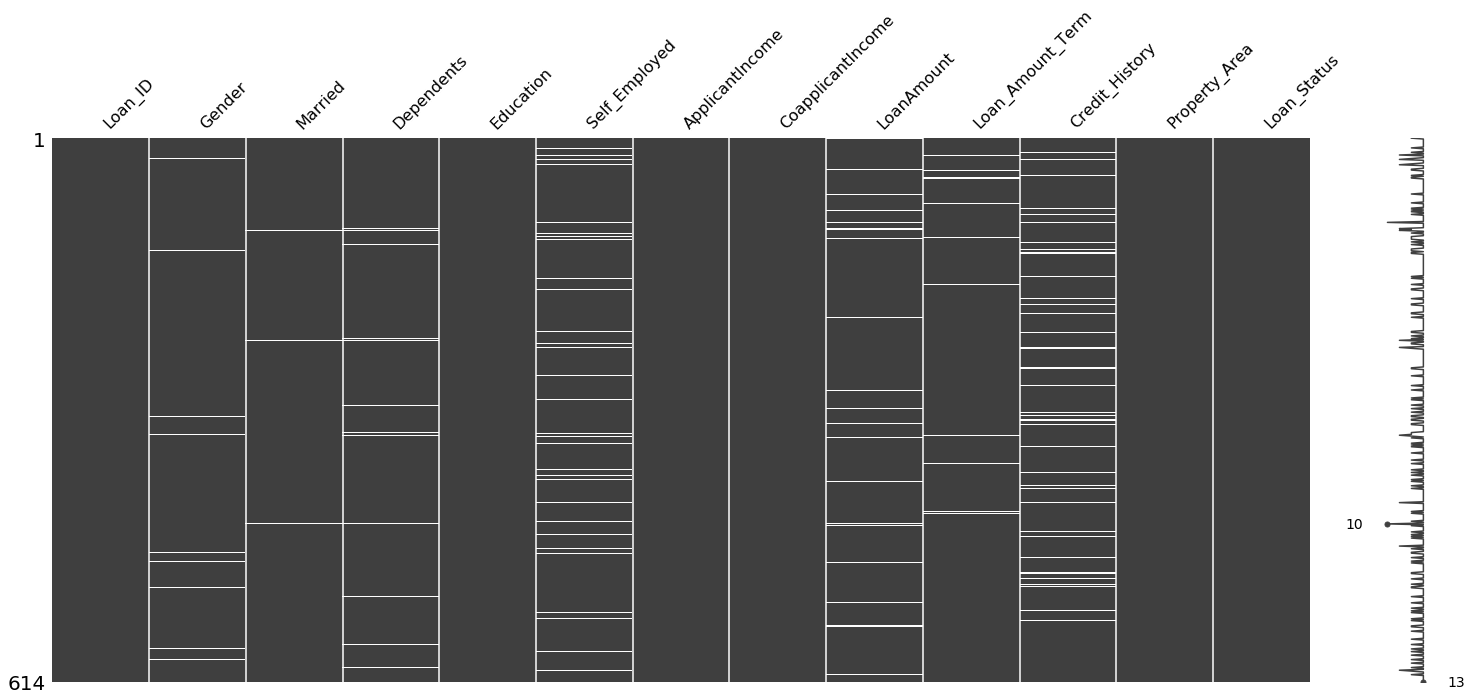

In [15]:
msno.matrix(train_loan)

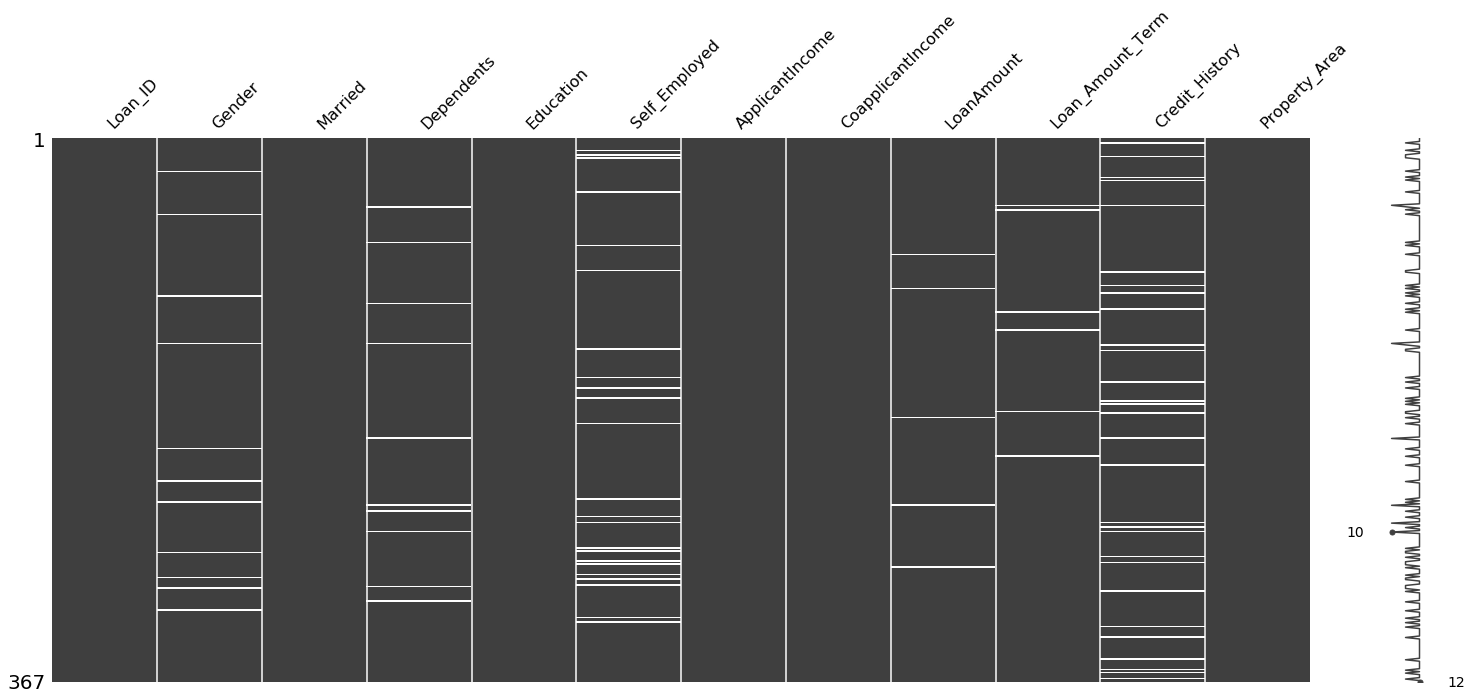

In [16]:
msno.matrix(test_loan)

In [17]:
train_loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [19]:
corr_train = train_loan.corr()

In [18]:
import seaborn as sns

# correlation through Heatmap

### correlation visualization

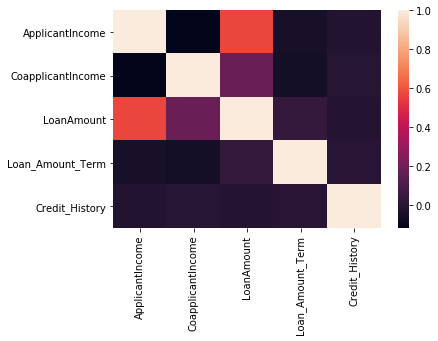

In [20]:
sns.heatmap(corr_train)

In [27]:
col_names = train_loan.columns

In [41]:
count = 0 # categorial features count
for i in col_names: 
    if train_loan[i].dtype == 'object' :
        count = count + 1
print(count)

8


In [36]:
print(train_loan['Loan_ID'].dtype)

object


In [39]:
print(train_loan['ApplicantIncome'].dtype)

int64


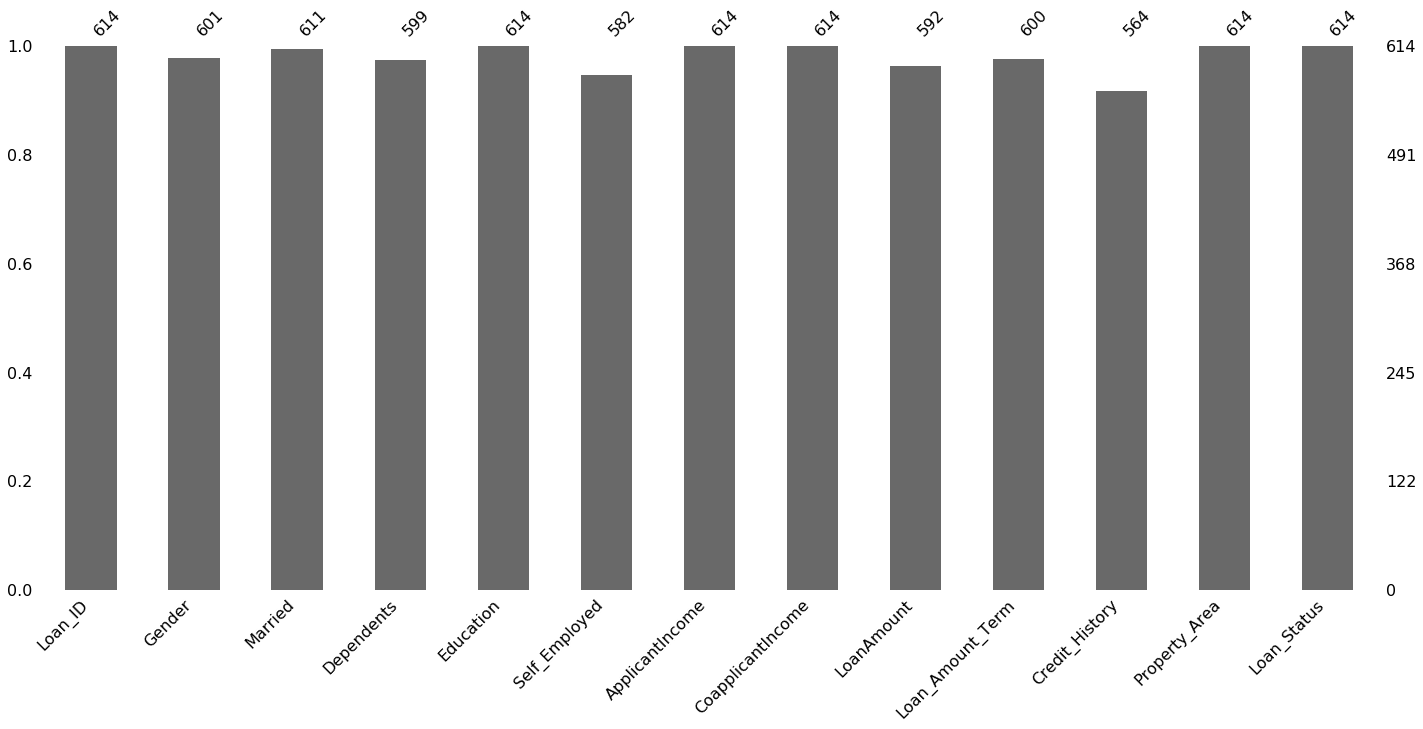

In [40]:
msno.bar(train_loan)

In [38]:
train_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Fill null values

In [63]:
train_loan.notnull().sum()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [61]:
train_loan['Gender'].isna().sum()

13

In [47]:
test_loan.notnull().count()

Loan_ID              367
Gender               367
Married              367
Dependents           367
Education            367
Self_Employed        367
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           367
Loan_Amount_Term     367
Credit_History       367
Property_Area        367
dtype: int64

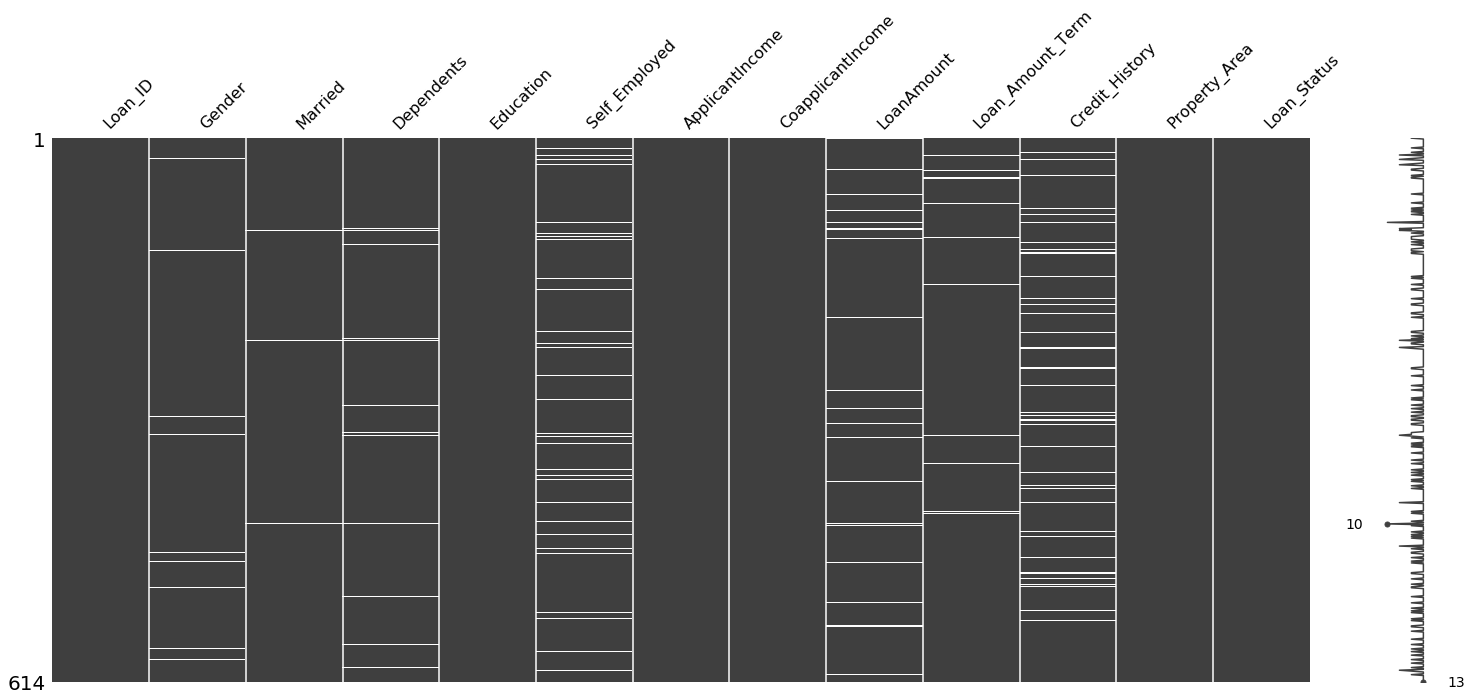

In [52]:
msno.matrix(train_loan)

In [56]:
train_loan.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [57]:
train_loan['Gender'].isnull().any()

True

In [59]:
train_loan['Gender'].isnull().sum()

13

In [60]:
train_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [64]:
test_loan.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [69]:
count = 0 # Null columns count 
for i in col_names: 
    if train_loan[i].isnull().any() == True :
        count = count + 1
print(count)

7


In [71]:
def null_feature(data):
    count= 0
    col_names = data.columns
    for i in col_names:
        if data[i].isnull().any() == True :
            count = count + 1
    print(count)
data = train_loan
null_feature(data)

7


In [73]:
null_feature(test_loan)

6


In [96]:
def fill_null(data):
    col_names = data.columns
    for i in col_names:
        if data[i].isnull().any() == True :
            data[i] = data[i].fillna(method = 'ffill')
    print(data.isnull().sum())

### Fill all null values

In [97]:
fill_null(train_loan)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [98]:
train_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [99]:
train_loan['LoanAmount'].fillna(train_loan['LoanAmount'].mean(),inplace =True)

In [100]:
train_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [94]:
null_feature(train_loan)

7


In [93]:
train_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
fill_null(test_loan)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


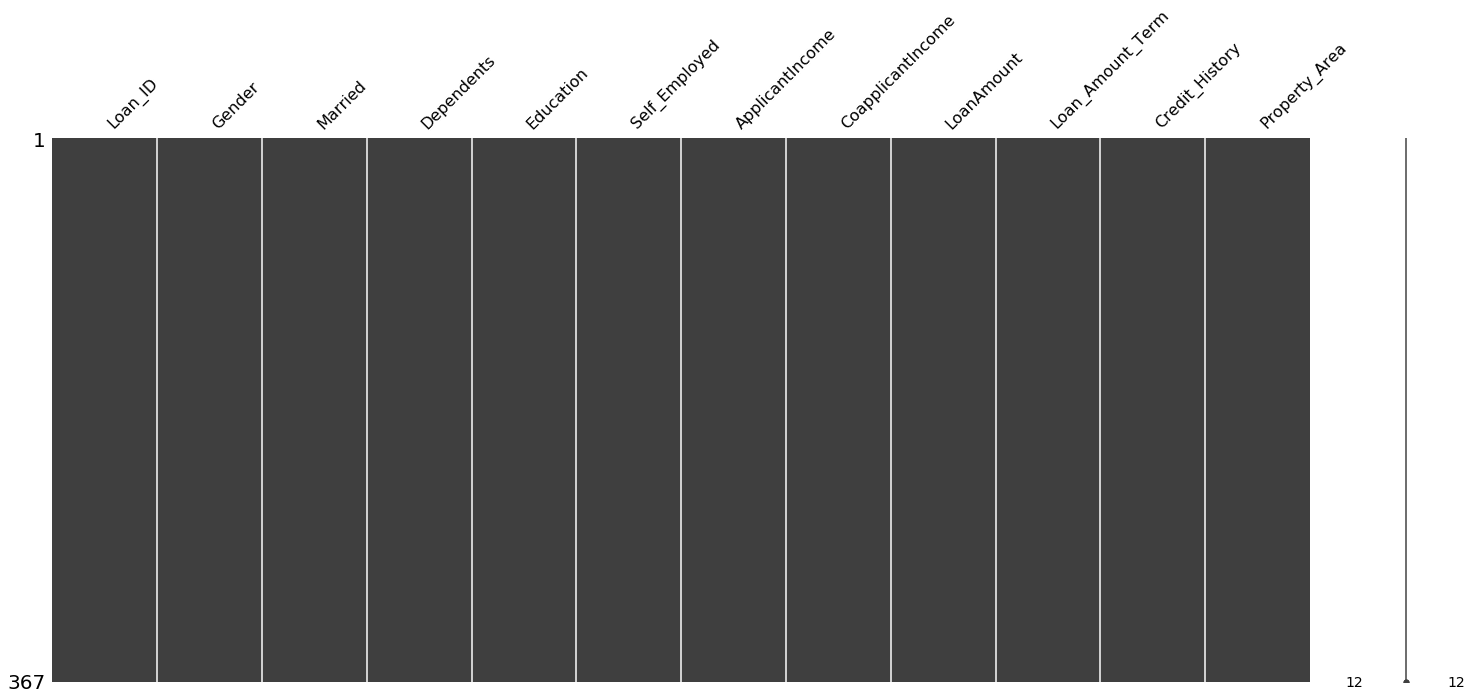

In [87]:
msno.matrix(test_loan)

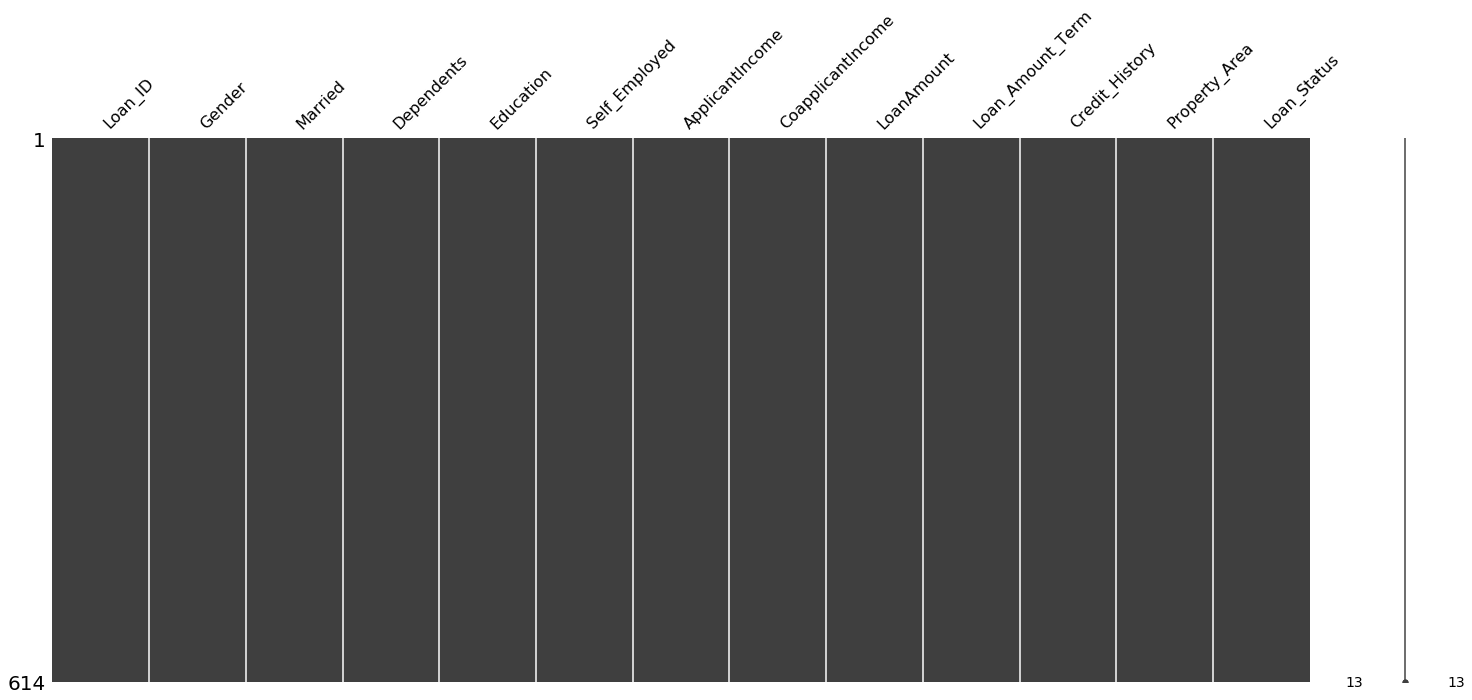

In [101]:
msno.matrix(train_loan)

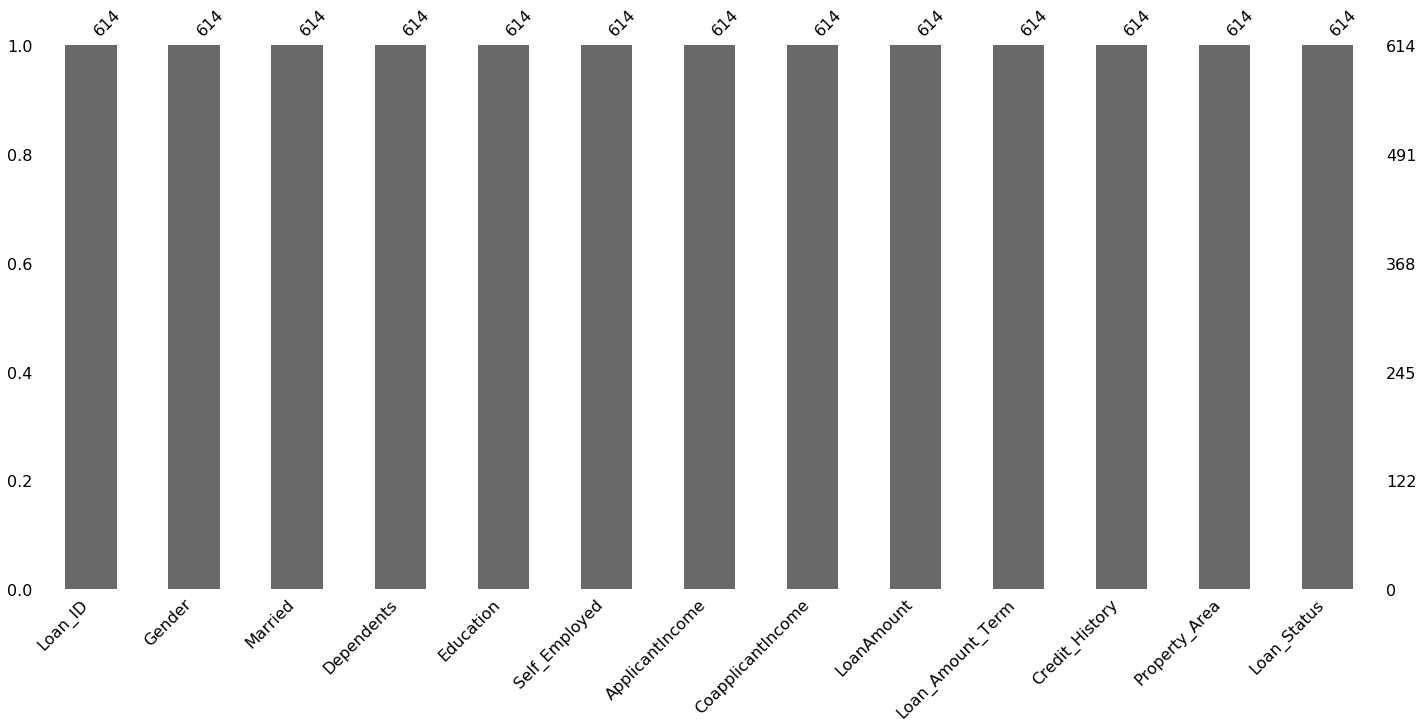

In [102]:
msno.bar(train_loan)

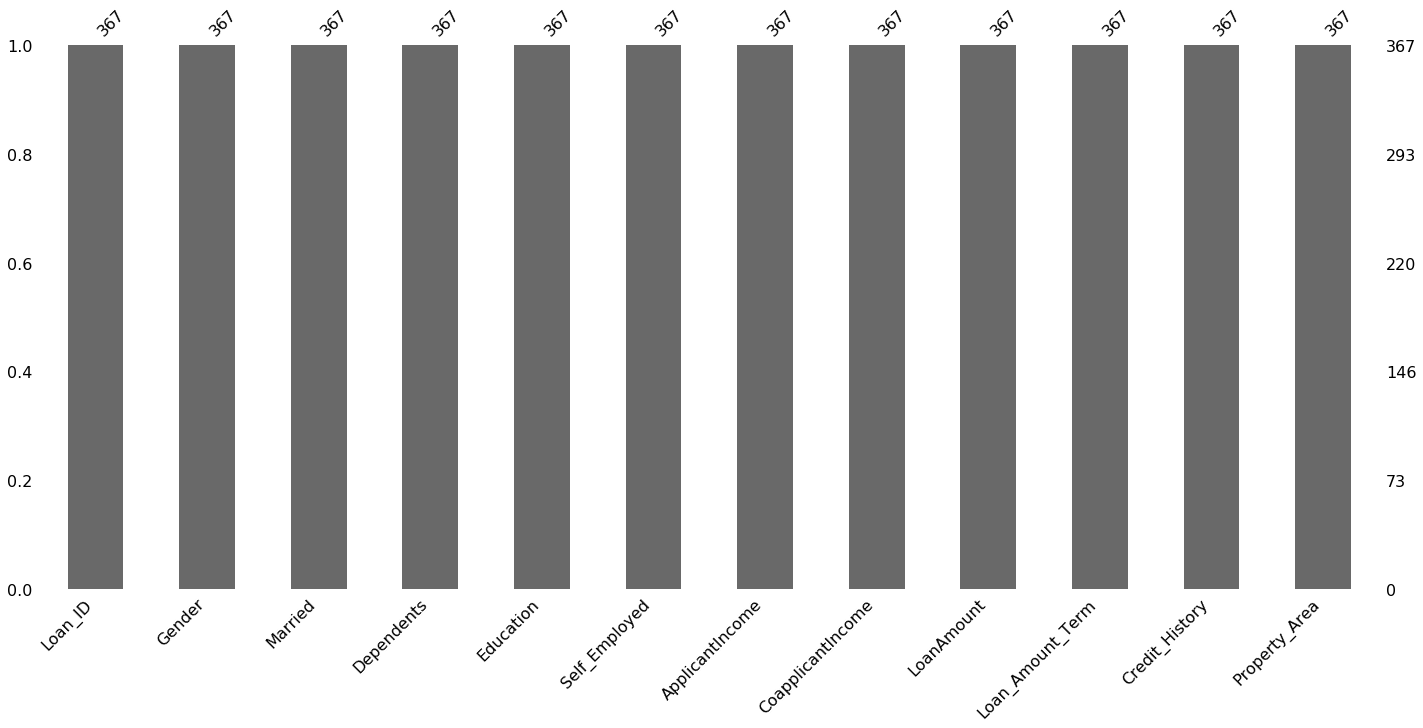

In [103]:
msno.bar(test_loan)

In [104]:
train_loan['Loan_Status'].unique

<bound method Series.unique of 0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object>

In [105]:
train_loan['Loan_Status'] = np.where(train_loan['Loan_Status']=='Y',1,0)

In [106]:
train_loan['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [107]:
train_loan.Gender = train_loan.Gender.replace({"Male":1,"Female":0})

In [108]:
train_loan.Gender

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int64

In [112]:
train_loan.Married = train_loan.Married.replace({"Yes": 1, "No" : 0})
test_loan.Married = test_loan.Married.replace({"Yes": 1, "No" : 0})

train_loan.Self_Employed = train_loan.Self_Employed.replace({"Yes": 1, "No" : 0})
test_loan.Self_Employed = test_loan.Self_Employed.replace({"Yes": 1, "No" : 0})

test_loan.Gender = test_loan.Gender.replace({"Male":1,"Female":0})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [114]:
test_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,Graduate,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,1,2,Graduate,0,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,1,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,Urban


In [115]:
train_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,5849,0.0,147.381729,360.0,1.0,Urban,1
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [118]:
test_loan["Gender"].unique()

array([1, 0], dtype=int64)

In [119]:
train_loan["Gender"].unique()

array([1, 0], dtype=int64)

In [116]:
train_loan.shape,test_loan.shape

((614, 13), (367, 12))

In [121]:
from sklearn.preprocessing import LabelEncoder
col_feature = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in col_feature:
    train_loan[col] = le.fit_transform(train_loan[col])
    test_loan[col] = le.fit_transform(test_loan[col])

In [122]:
train_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,147.381729,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [123]:
test_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [125]:
new_train_corr = train_loan.corr()
new_train_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.371532,0.164475,0.049480,0.011676,0.046230,0.086991,0.100652,-0.080085,-0.008501,-0.019854,0.012213
Married,0.371532,1.000000,0.333841,0.014097,-0.000257,0.049052,0.077760,0.132982,-0.099170,0.007358,0.004415,0.089072
Dependents,0.164475,0.333841,1.000000,0.054909,0.044505,0.115036,0.026683,0.141705,-0.085453,-0.070299,0.005131,-0.003361
Education,0.049480,0.014097,0.054909,1.000000,-0.008734,-0.140760,-0.062290,-0.151960,-0.080674,-0.084637,-0.065243,-0.085884
Self_Employed,0.011676,-0.000257,0.044505,-0.008734,1.000000,0.122728,-0.021807,0.099377,-0.035485,-0.010803,-0.037106,0.009035
ApplicantIncome,0.046230,0.049052,0.115036,-0.140760,0.122728,1.000000,-0.116605,0.533384,-0.042849,-0.020183,-0.009500,-0.004710
CoapplicantIncome,0.086991,0.077760,0.026683,-0.062290,-0.021807,-0.116605,1.000000,0.189627,-0.067336,0.009391,0.010522,-0.059187
LoanAmount,0.100652,0.132982,0.141705,-0.151960,0.099377,0.533384,0.189627,1.000000,0.023759,-0.013046,-0.038247,-0.044380
Loan_Amount_Term,-0.080085,-0.099170,-0.085453,-0.080674,-0.035485,-0.042849,-0.067336,0.023759,1.000000,-0.031843,-0.066556,-0.033378
Credit_History,-0.008501,0.007358,-0.070299,-0.084637,-0.010803,-0.020183,0.009391,-0.013046,-0.031843,1.000000,0.021124,0.525152


In [126]:
new_test_corr = test_loan.corr()
new_test_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.282828,0.114665,0.022330,0.063326,0.076782,0.075561,0.090628,-0.054391,0.042770,-0.008124
Married,0.282828,1.000000,0.349000,0.049443,0.034823,0.051265,0.032548,0.180853,0.034637,0.026262,0.010921
Dependents,0.114665,0.349000,1.000000,0.107078,-0.026532,0.136139,-0.055212,0.112094,-0.082404,-0.035999,0.062643
Education,0.022330,0.049443,0.107078,1.000000,-0.014850,-0.136369,-0.057318,-0.144555,0.049807,-0.035509,-0.028660
Self_Employed,0.063326,0.034823,-0.026532,-0.014850,1.000000,0.074877,-0.032769,0.073917,-0.021512,0.055642,-0.097807
ApplicantIncome,0.076782,0.051265,0.136139,-0.136369,0.074877,1.000000,-0.110335,0.496500,0.025403,0.053752,0.039403
CoapplicantIncome,0.075561,0.032548,-0.055212,-0.057318,-0.032769,-0.110335,1.000000,0.142079,-0.010235,-0.051300,-0.095955
LoanAmount,0.090628,0.180853,0.112094,-0.144555,0.073917,0.496500,0.142079,1.000000,0.100129,-0.061724,-0.015937
Loan_Amount_Term,-0.054391,0.034637,-0.082404,0.049807,-0.021512,0.025403,-0.010235,0.100129,1.000000,-0.054370,0.014962
Credit_History,0.042770,0.026262,-0.035999,-0.035509,0.055642,0.053752,-0.051300,-0.061724,-0.054370,1.000000,0.051748


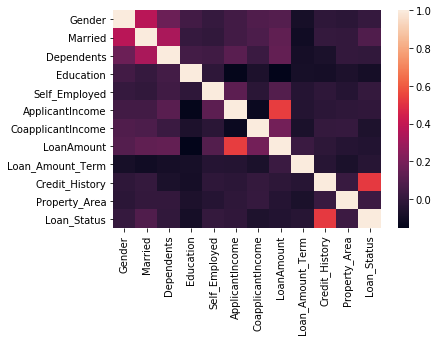

In [127]:
sns.heatmap(new_train_corr)

## EDA and final correlation

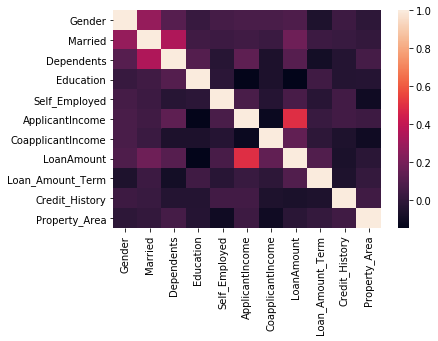

In [128]:
sns.heatmap(new_test_corr)

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

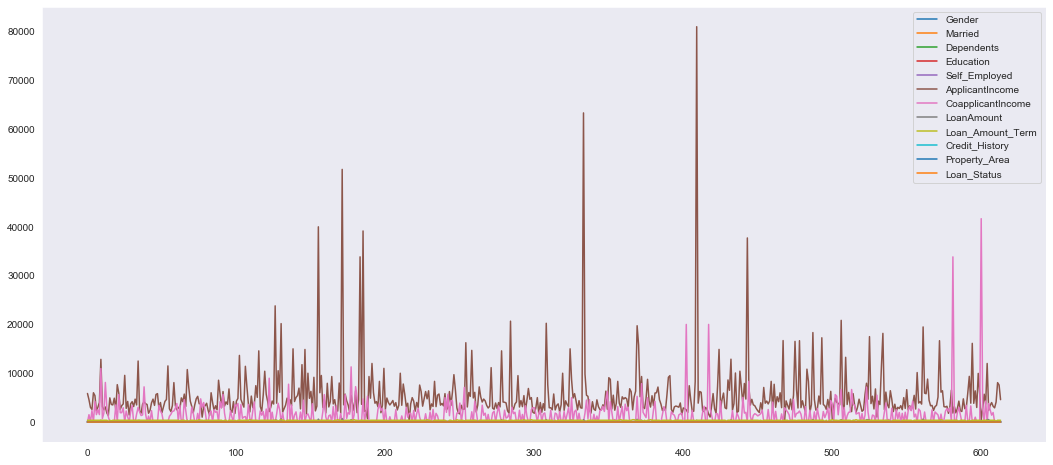

In [130]:
sns.set_style('dark')
train_loan.plot(figsize= (18,8))
plt.show()

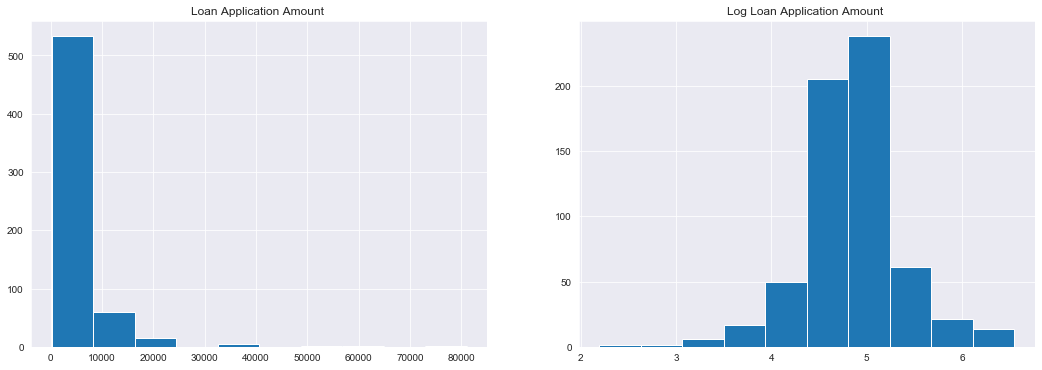

In [131]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


train_loan['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(train_loan['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

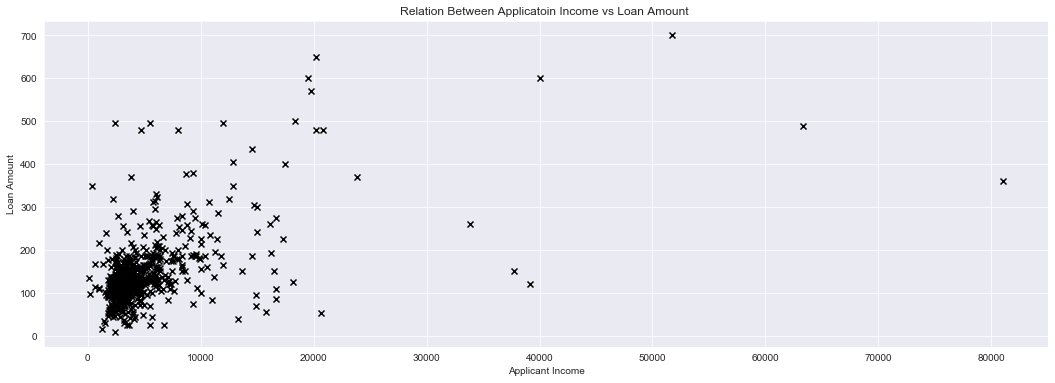

In [132]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(train_loan['ApplicantIncome'] , train_loan['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

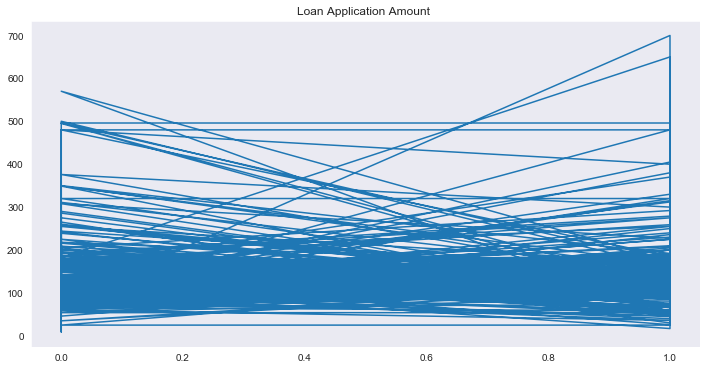

In [133]:
plt.figure(figsize=(12, 6))
plt.plot(train_loan['Loan_Status'], train_loan['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

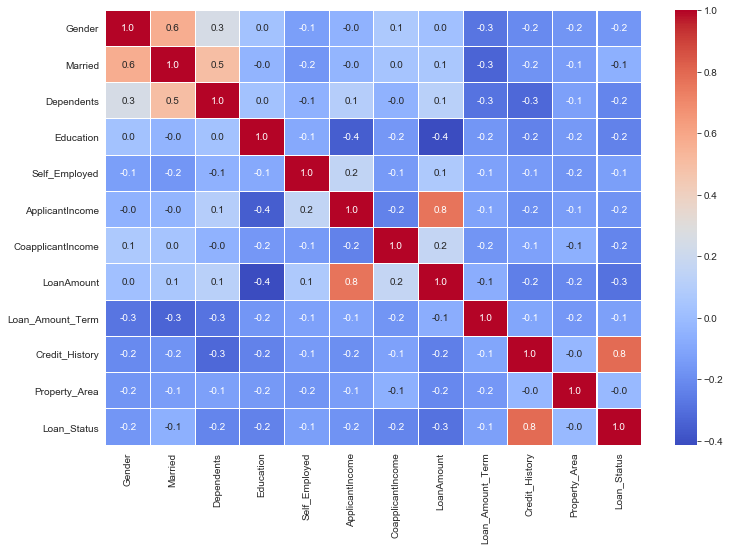

In [135]:
plt.figure(figsize=(12,8))
sns.heatmap(new_train_corr.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

## Logistic Model apply

In [136]:
from sklearn.linear_model import LogisticRegression

In [138]:
from sklearn.metrics import accuracy_score,classification_report

In [154]:
logistic_model = LogisticRegression()

In [146]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = train_loan[train_features].values
y_train = train_loan['Loan_Status'].values

x_test = test_loan[train_features].values


In [150]:
x_train.shape

(614, 3)

In [151]:
y_train.shape,x_test.shape

((614,), (367, 3))

In [155]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
predicted = logistic_model.predict(x_test)

## Score

In [157]:
score = logistic_model.score(x_train,y_train)
score

0.8061889250814332

In [162]:
logistic_model.coef_

array([[ 2.91106078, -0.28742646,  0.12535932]])

## model intercept

In [165]:
logistic_model.intercept_

array([-1.62744319])

# Model accuracy

In [166]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8061889250814332
accuracy_score percent : 80.62


In [171]:
x1_train = train_loan.drop(['Loan_Status'],axis = 1)

In [172]:
x1_train.shape

(614, 12)

In [173]:
x1_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,0,0,0,0,5849,0.0,147.381729,360.0,1.0,2
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [175]:
y1_train = train_loan['Loan_Status']

In [177]:
y1_train.shape

(614,)

In [179]:
test_loan.shape

(367, 12)

## tried Random forest but got poor accuracy

In [185]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
rfc = RandomForestRegressor()

In [188]:
rfc.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [189]:
rfc.score(x_train,y_train)

0.2799027116322771